# Urbanization of Africa

A look into urbanization data for African countries, from 1950 to 2015.

- Date: 2019-03-20
- Source: [Africapolis.org](http://africapolis.org)

## Setup

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from src.lang import africapolis_countries
from src.plot import ds_style

%config InlineBackend.figure_format = 'retina'

if 'datastory' in plt.style.available:
    plt.style.use('datastory')

In [135]:
df = pd.read_excel('../data/raw/Africapolis_country.xlsx', skiprows=15)

In [136]:
df.head()

,Country,Country_FR,AU_Regions,ISO,Upop2015,Urbanlevel2015,NumAgglos2015,Mpop2015,ADBA2015,Usurf,...,Mpop1990,Mpop2000,Mpop2010,ADBA1950,ADBA1960,ADBA1970,ADBA1980,ADBA1990,ADBA2000,ADBA2010
0,Angola,Angola,Southern Africa,AGO,15862758,0.63,96,0.44,54.2,0.001879,...,0.47,0.46,0.50,189.0,179.0,199.0,127.0,93.0,73.0,57.0
1,Burundi,Burundi,Central Africa,BDI,2054027,0.21,33,0.51,15.1,0.020619,...,0.79,0.77,0.52,0.0,0.0,0.0,64.0,44.0,48.0,17.0
2,Benin,Bénin,West Africa,BEN,5272274,0.488542,122,0.41,14.2,0.010811,...,0.58,0.55,0.44,45.0,62.0,43.0,40.0,34.0,25.0,17.0
3,Burkina Faso,Burkina Faso,West Africa,BFA,5271971,0.290136,101,0.56,28.3,0.004311,...,0.60,0.56,0.57,141.0,143.0,135.0,58.0,52.0,38.0,34.0
4,Botswana,Botswana,Southern Africa,BWA,1224313,0.56,25,0.30,54.6,0.001344,...,0.26,0.26,0.28,0.0,0.0,79.0,92.0,59.0,53.0,59.0


## Transform

In [137]:
df = (df
    .dropna(subset=['Country'])
    .apply(lambda x: pd.to_numeric(x, errors='ignore'), axis=1)
    .filter(regex='Country$|Urbanlevel\d+')
    .melt(id_vars=['Country'])
    .assign(variable=lambda x: x.variable.str.replace('Urbanlevel', '').astype(int))
    .rename(columns={'Country': 'country', 'variable': 'year'})
    .query('year == 1950 | year == 2015')
    .assign(country=lambda x: x.country.map(africapolis_countries))
    .pivot_table(index='country', columns='year', values='value')
    .mul(100)
    .sort_values(1950))

## Plot

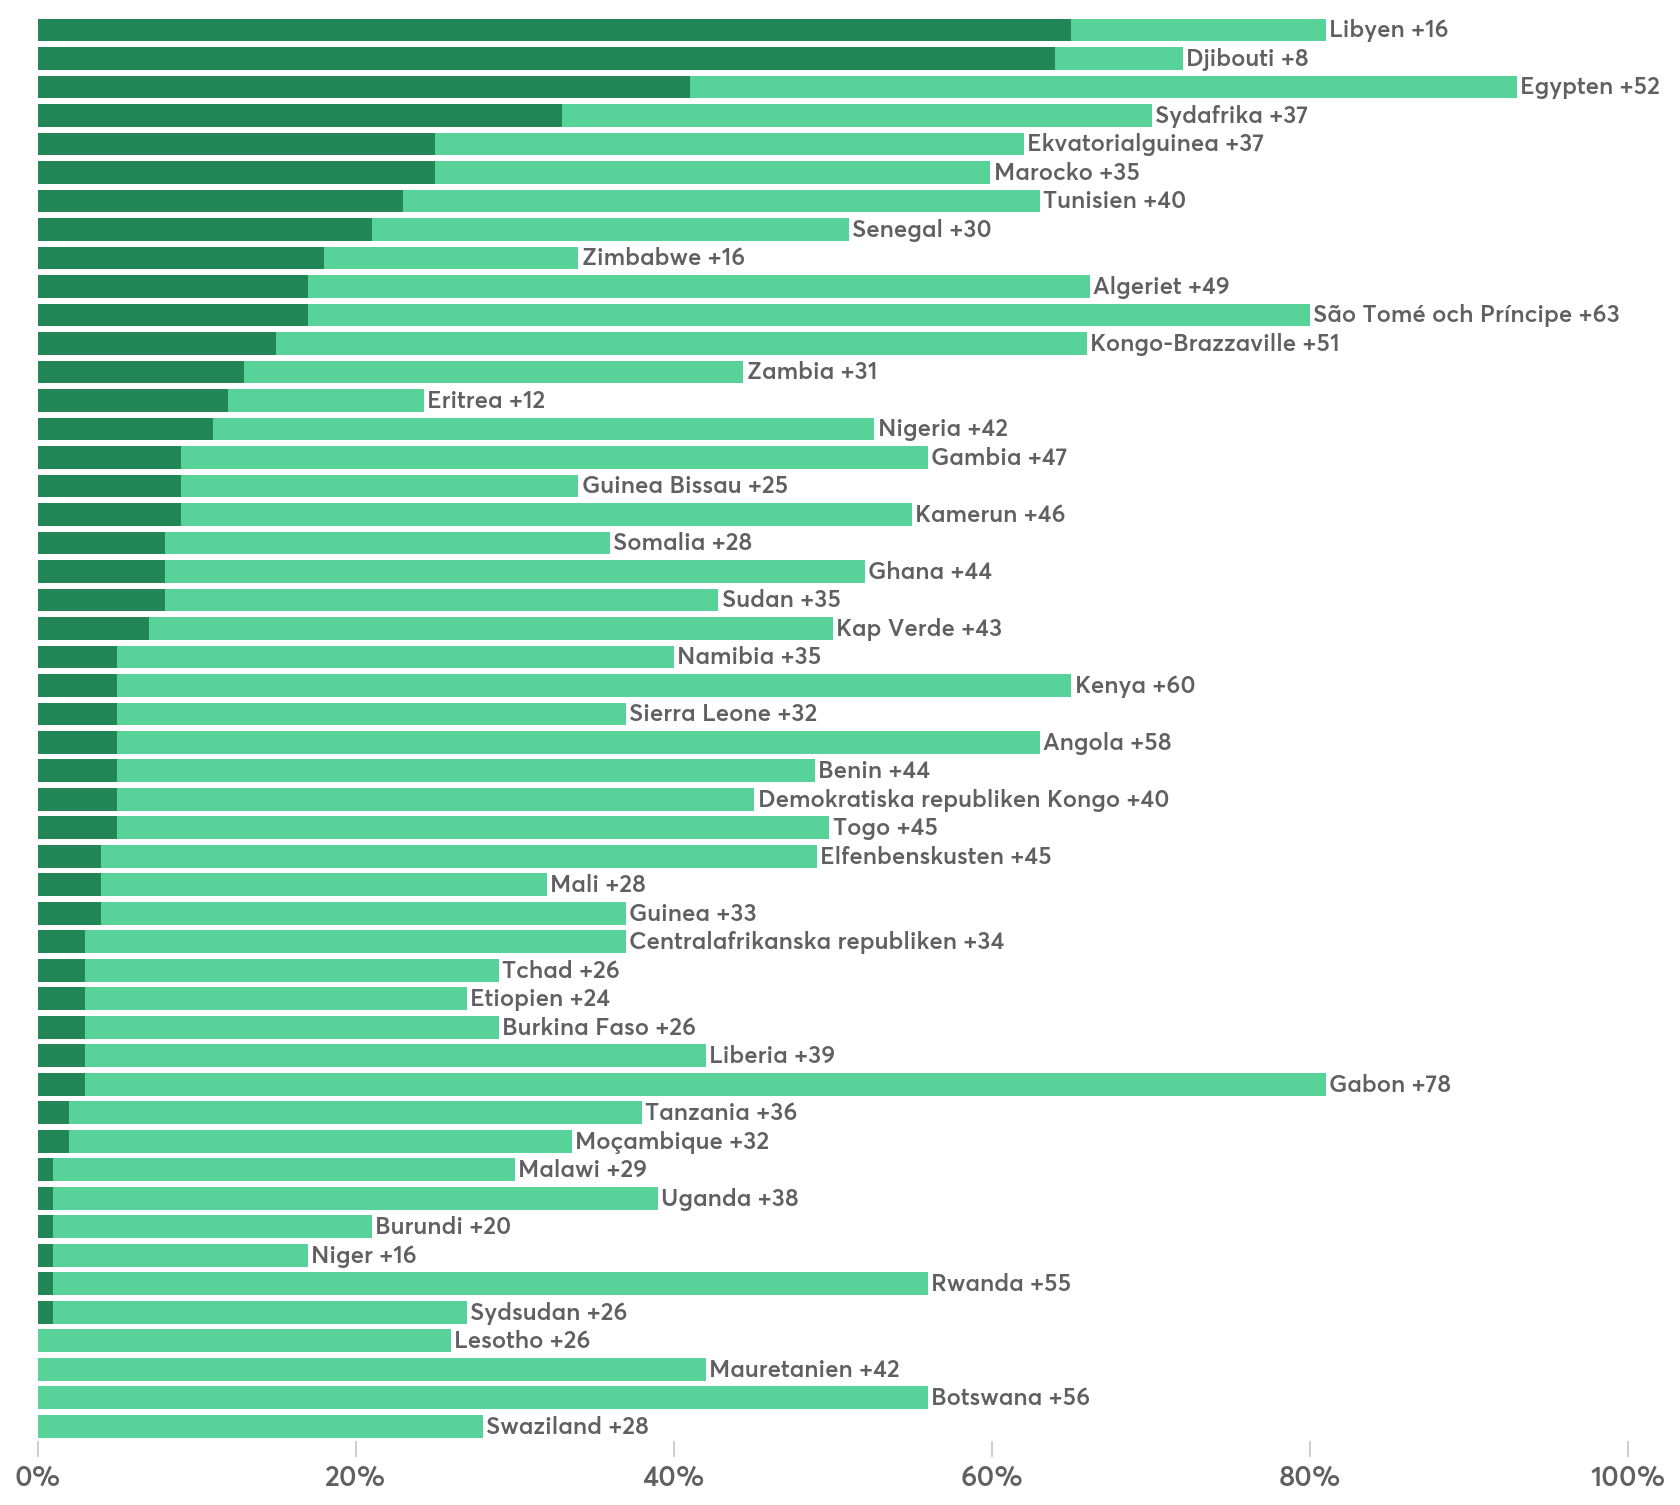

In [138]:
COLOR_1950 = '#238657'
COLOR_2015 = '#57d298'

# Set up figure
w = 12
h = w * 0.9
figsize = (w, h)
fig, ax = plt.subplots(figsize=figsize)
plt.tight_layout(rect=(0.01, 0.02, 1, 1))

# Plot bars
ax.barh(df.index, df[2015], color=COLOR_2015)
ax.barh(df.index, df[1950], color=COLOR_1950)

# Customize axes
ax.get_yaxis().set_ticks([])
ax.set_xlim(0, 100)
ax.set_ylim(-.5, 49.5)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# Add country labels
fd = {'size': 12, 'weight': 'semibold', 'color': '#606062'}
fd2 = {'size': 14, 'weight': 500, 'color': '#606062'}
for i, country in enumerate(df.index):
    x = df.loc[country][2015] + 0.2
    diff = df.loc[country][2015] - df.loc[country][1950]
    diff = int(round(diff))
    ax.text(x, i, f'{country} +{diff}', va='center', fontdict=fd)

ds_style(ax)

# Export
fig.set_facecolor('#ffffff')
fig.savefig('../charts/urbanization-africa.png')